# Complete Implementation of *MobileNetV3* for abdominal dataset

In [8]:
from trainer import TrainingClass
from loader import load_data

# Define paths
train_data_dir = '../data/train_resized/slices'  
train_mask_dir = '../data/train_resized/masks'
val_data_dir = '../data/val_resized/slices'  
val_mask_dir = '../data/val_resized/masks'

# Load data
train_loader, val_loader = load_data(train_data_dir, train_mask_dir, val_data_dir, val_mask_dir)

### Skip the training cell if you don't want to do training

In [ ]:
# Training setup
training_instance = TrainingClass(learning_rate=1e-4)
training_instance.train(train_loader, val_loader, num_epochs=200)

# Save the model
model_save_path = './model/mobilenetv3_model.pth'
training_instance.save_model(model_save_path)

### Validation of predicted masks

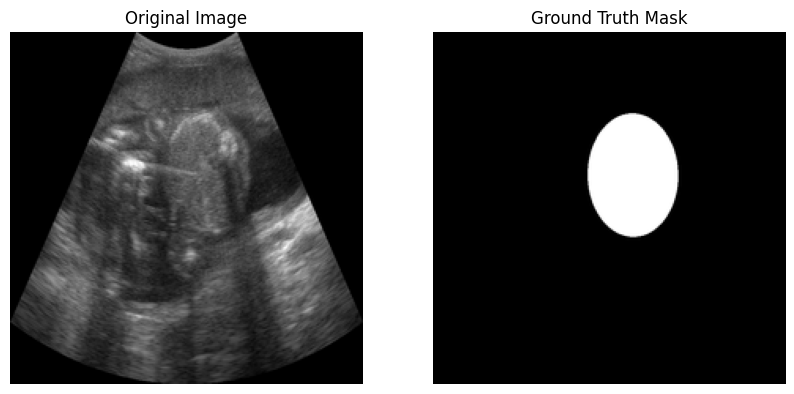

In [9]:
from plotting import plot_image_and_mask
# Get a batch of data
data_iter = iter(train_loader)
image, mask = next(data_iter)  # Get one batch of image and mask

# Plot the first image and mask
plot_image_and_mask(image[0], mask[0])  # Index [0] to select the first item in the batch

### Loading model for making predictions

In [10]:
from model import MobileNetV3Segmentation
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MobileNetV3Segmentation().to(device)
model.load_state_dict(torch.load('./model/mobilenetv3_model.pth'))
# Set model to evaluation mode
model.eval()

/tmp/ipykernel_123927/2196966583.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./model/mobilenetv3_model.pth'))


MobileNetV3Segmentation(
  (base_model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequential(
          (0): Conv

### Plotting of predicted smooth masks

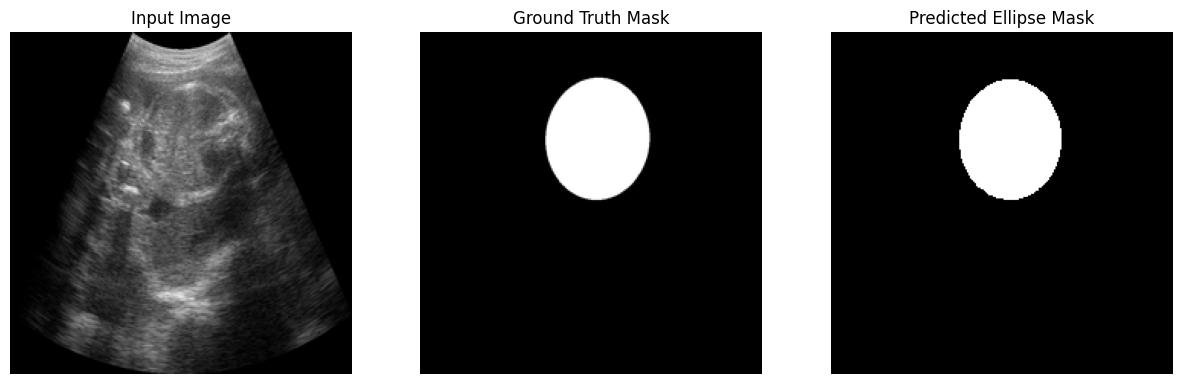

In [13]:
from plotting import visualize_prediction

# Example paths to image and mask (update these to match your dataset)
image_path = "../data/val_resized/slices/0d0a3298-a9c6-43c3-a9e3-df3a9c0afa06_slice_45.png"
mask_path = "../data/val_resized/masks/0d0a3298-a9c6-43c3-a9e3-df3a9c0afa06_slice_45_mask.png"

# Call the function to visualize prediction
visualize_prediction(image_path, mask_path, model, device)
